In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt

In [30]:
n = 1000
p = 100
n_groups = int(p/1)
seed = 0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(
    n, p, n_groups, rho=0
).values()

In [31]:
groups, group_sizes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
       dtype=int32),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32))

In [32]:
alpha = 1.0
penalty = np.ones(n_groups)
user_lmdas = [] #[1e-4, 1e-6]
max_n_lambdas = 100
n_lambdas_iter = 5
use_strong_rule = True
do_early_exit = True
verbose_diagnostic = True
delta_strong_size = 1
max_strong_size = p
max_n_cds = 100000
thr = 1e-8
newton_tol = 1e-8
newton_max_iters = 100000
min_ratio = 1e-2
n_threads = 16

In [34]:
out = gl.group_basil(
    X, y, groups, group_sizes, alpha, penalty, user_lmdas,
    max_n_lambdas,
    n_lambdas_iter,
    use_strong_rule,
    do_early_exit,
    verbose_diagnostic,
    delta_strong_size,
    max_strong_size,
    max_n_cds,
    thr,
    newton_tol,
    newton_max_iters,
    min_ratio,
    n_threads,
)

In [35]:
out['betas'], out['error'], np.array(out['rsqs']), np.array(out['lmdas'])

(<100x100 sparse matrix of type '<class 'numpy.float64'>'
 	with 6835 stored elements in Compressed Sparse Column format>,
 '',
 array([0.        , 0.00589027, 0.01398992, 0.0294031 , 0.04718066,
        0.06708772, 0.0983045 , 0.13128082, 0.16758852, 0.20245459,
        0.2419681 , 0.27525995, 0.30790646, 0.35366204, 0.38739824,
        0.44162228, 0.47382134, 0.52836285, 0.55722197, 0.61977353,
        0.64685316, 0.6716647 , 0.72942331, 0.7508977 , 0.8207576 ,
        0.84013226, 0.90471693, 0.92441473, 0.94258152, 1.01455101,
        1.08806897, 1.16162991, 1.17719407, 1.24979635, 1.26345505,
        1.27596876, 1.34803217, 1.35947736, 1.43456988, 1.50928173,
        1.51861935, 1.52712745, 1.53492614, 1.5420996 , 1.60847285,
        1.6149505 , 1.62096652, 1.62649621, 1.63161053, 1.63629669,
        1.6405951 , 1.64451165, 1.83397615, 1.83735288, 1.84042956,
        1.84323292, 1.8458083 , 1.84821508, 1.85043047, 1.85247424,
        1.85434706, 1.85611944, 1.85775538, 1.85928134, 

In [36]:
(
    np.array(out['diagnostic']['n_lambdas_proc']),
    np.array(out['diagnostic']['used_strong_rule']),
    np.argmax(np.array(out['rsqs']) >= 1),
)

(array([1, 1, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 1, 2, 3, 2, 1, 5,
        0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 4, 0, 0, 0, 3,
        5, 3, 5, 5, 5, 5, 5, 3]),
 array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1]),
 29)

In [38]:
out['diagnostic']['checkpoints']

[{'is_initialized': True,
  'strong_set': [],
  'strong_g1': [],
  'strong_g2': [],
  'strong_begins': [],
  'strong_order': [],
  'strong_beta': [],
  'strong_grad': [],
  'strong_A_diag': [],
  'active_set': [],
  'active_g1': [],
  'active_g2': [],
  'active_begins': [],
  'active_order': [],
  'is_active': [],
  'grad': array([-0.57968435,  1.41394003, -0.49443774, -0.26464663, -0.51235107,
         -0.71507931, -0.57911853, -0.49392855,  1.5097934 , -0.6404181 ,
         -0.54294796,  0.28048001,  0.12693264, -0.13693848,  0.19461043,
          0.57940091,  1.35863337,  0.63970404,  1.12671596,  2.10778349,
         -1.65052918, -0.55895443, -0.05049255,  0.99091643, -0.33114318,
         -0.4457472 , -0.30800011, -0.42117012, -0.43534088, -0.46233968,
         -1.11273739,  1.29078253,  0.14262343,  1.43389459, -0.48327751,
         -1.32987083, -0.33560033,  1.81593972,  0.35733083, -2.23855999,
          1.81966146, -0.46692329, -0.4176353 , -1.48888549, -1.07937397,
         -

In [49]:
ckpts = out['diagnostic']['checkpoints']
for ckpt in ckpts:
    ss = np.array(ckpt['strong_set'], dtype=int)
    so = np.array(ckpt['strong_order'], dtype=int)
    if np.any(ss[so] != np.sort(ss)):
        print(ss)
        print(so)

In [64]:
out['betas'][:, 6].todense()[[19, 39, 60, 77, 90, 37, 40, 50, 53, 70, 76, 89, 20, 75, 82]]

matrix([[ 0.35652245],
        [-0.43441266],
        [-0.53315799],
        [ 0.32242026],
        [ 0.34632888],
        [ 0.07129225],
        [ 0.11507677],
        [-0.13141696],
        [-0.10279882],
        [ 0.04044473],
        [-0.01438245],
        [ 0.06920046],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]])

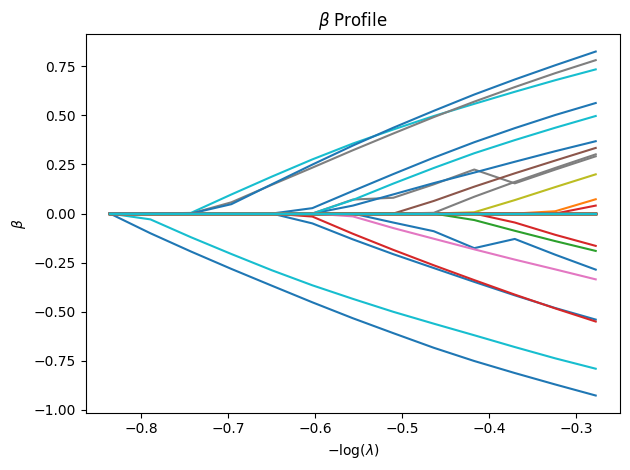

In [17]:
for j in range(out['betas'].shape[0]):
    plt.plot(-np.log(out['lmdas'][:13]), out['betas'][j].todense().reshape((-1,1))[:13])
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()